In [5]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


Automatically created module for IPython interactive environment


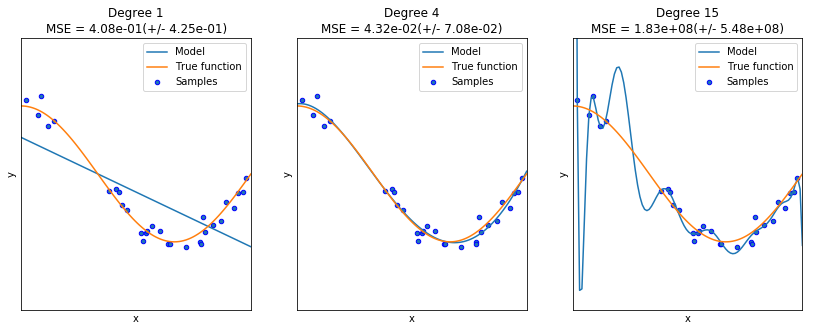

In [7]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

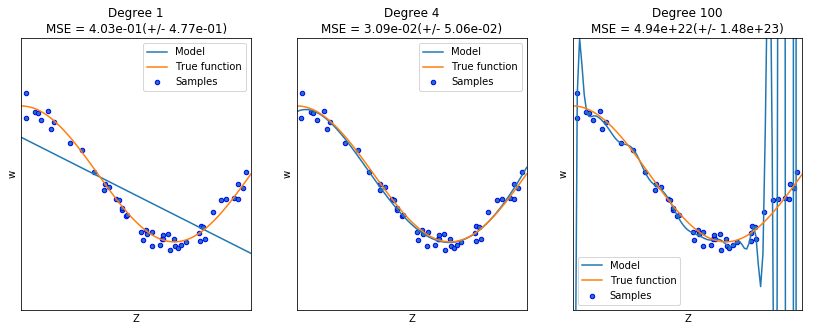

In [17]:
def true_fun(Z):
    return np.cos(1.5 * np.pi * Z)

np.random.seed(0)

n_samples = 50
degrees = [1, 4, 100]

Z = np.sort(np.random.rand(n_samples))
w = true_fun(Z) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(Z[:, np.newaxis], w)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z[:, np.newaxis], w,
                             scoring="neg_mean_squared_error", cv=10)

    Z_test = np.linspace(0, 1, 100)
    plt.plot(Z_test, pipeline.predict(Z_test[:, np.newaxis]), label="Model")
    plt.plot(Z_test, true_fun(Z_test), label="True function")
    plt.scatter(Z, w, edgecolor='b', s=20, label="Samples")
    plt.xlabel("Z")
    plt.ylabel("w")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
#サンプル数を増やすと、degreeによってグラフによる大きな差は無くなる
n_samples = 80
degrees = [2, 3, 15]
#サンプル数減らすと、とんでもない形になる(ランダムな誤差をモデルで説明しようとする)
n_samples = 10
degrees = [2, 3, 15]
#次元を増やすと、データが疎な部分を無理やり説明しようとする
n_samples = 50
degrees = [1, 4, 100]